In [122]:
from PIL import Image
import pytesseract
import numpy as np
import cv2

### Basics

In [132]:
# Import image
folder_name = 'untouched/CIAUFOCD-FULL-UNTOUCHED/'
file_name = 'C05516003.tif'
img = Image.open(folder_name+file_name)

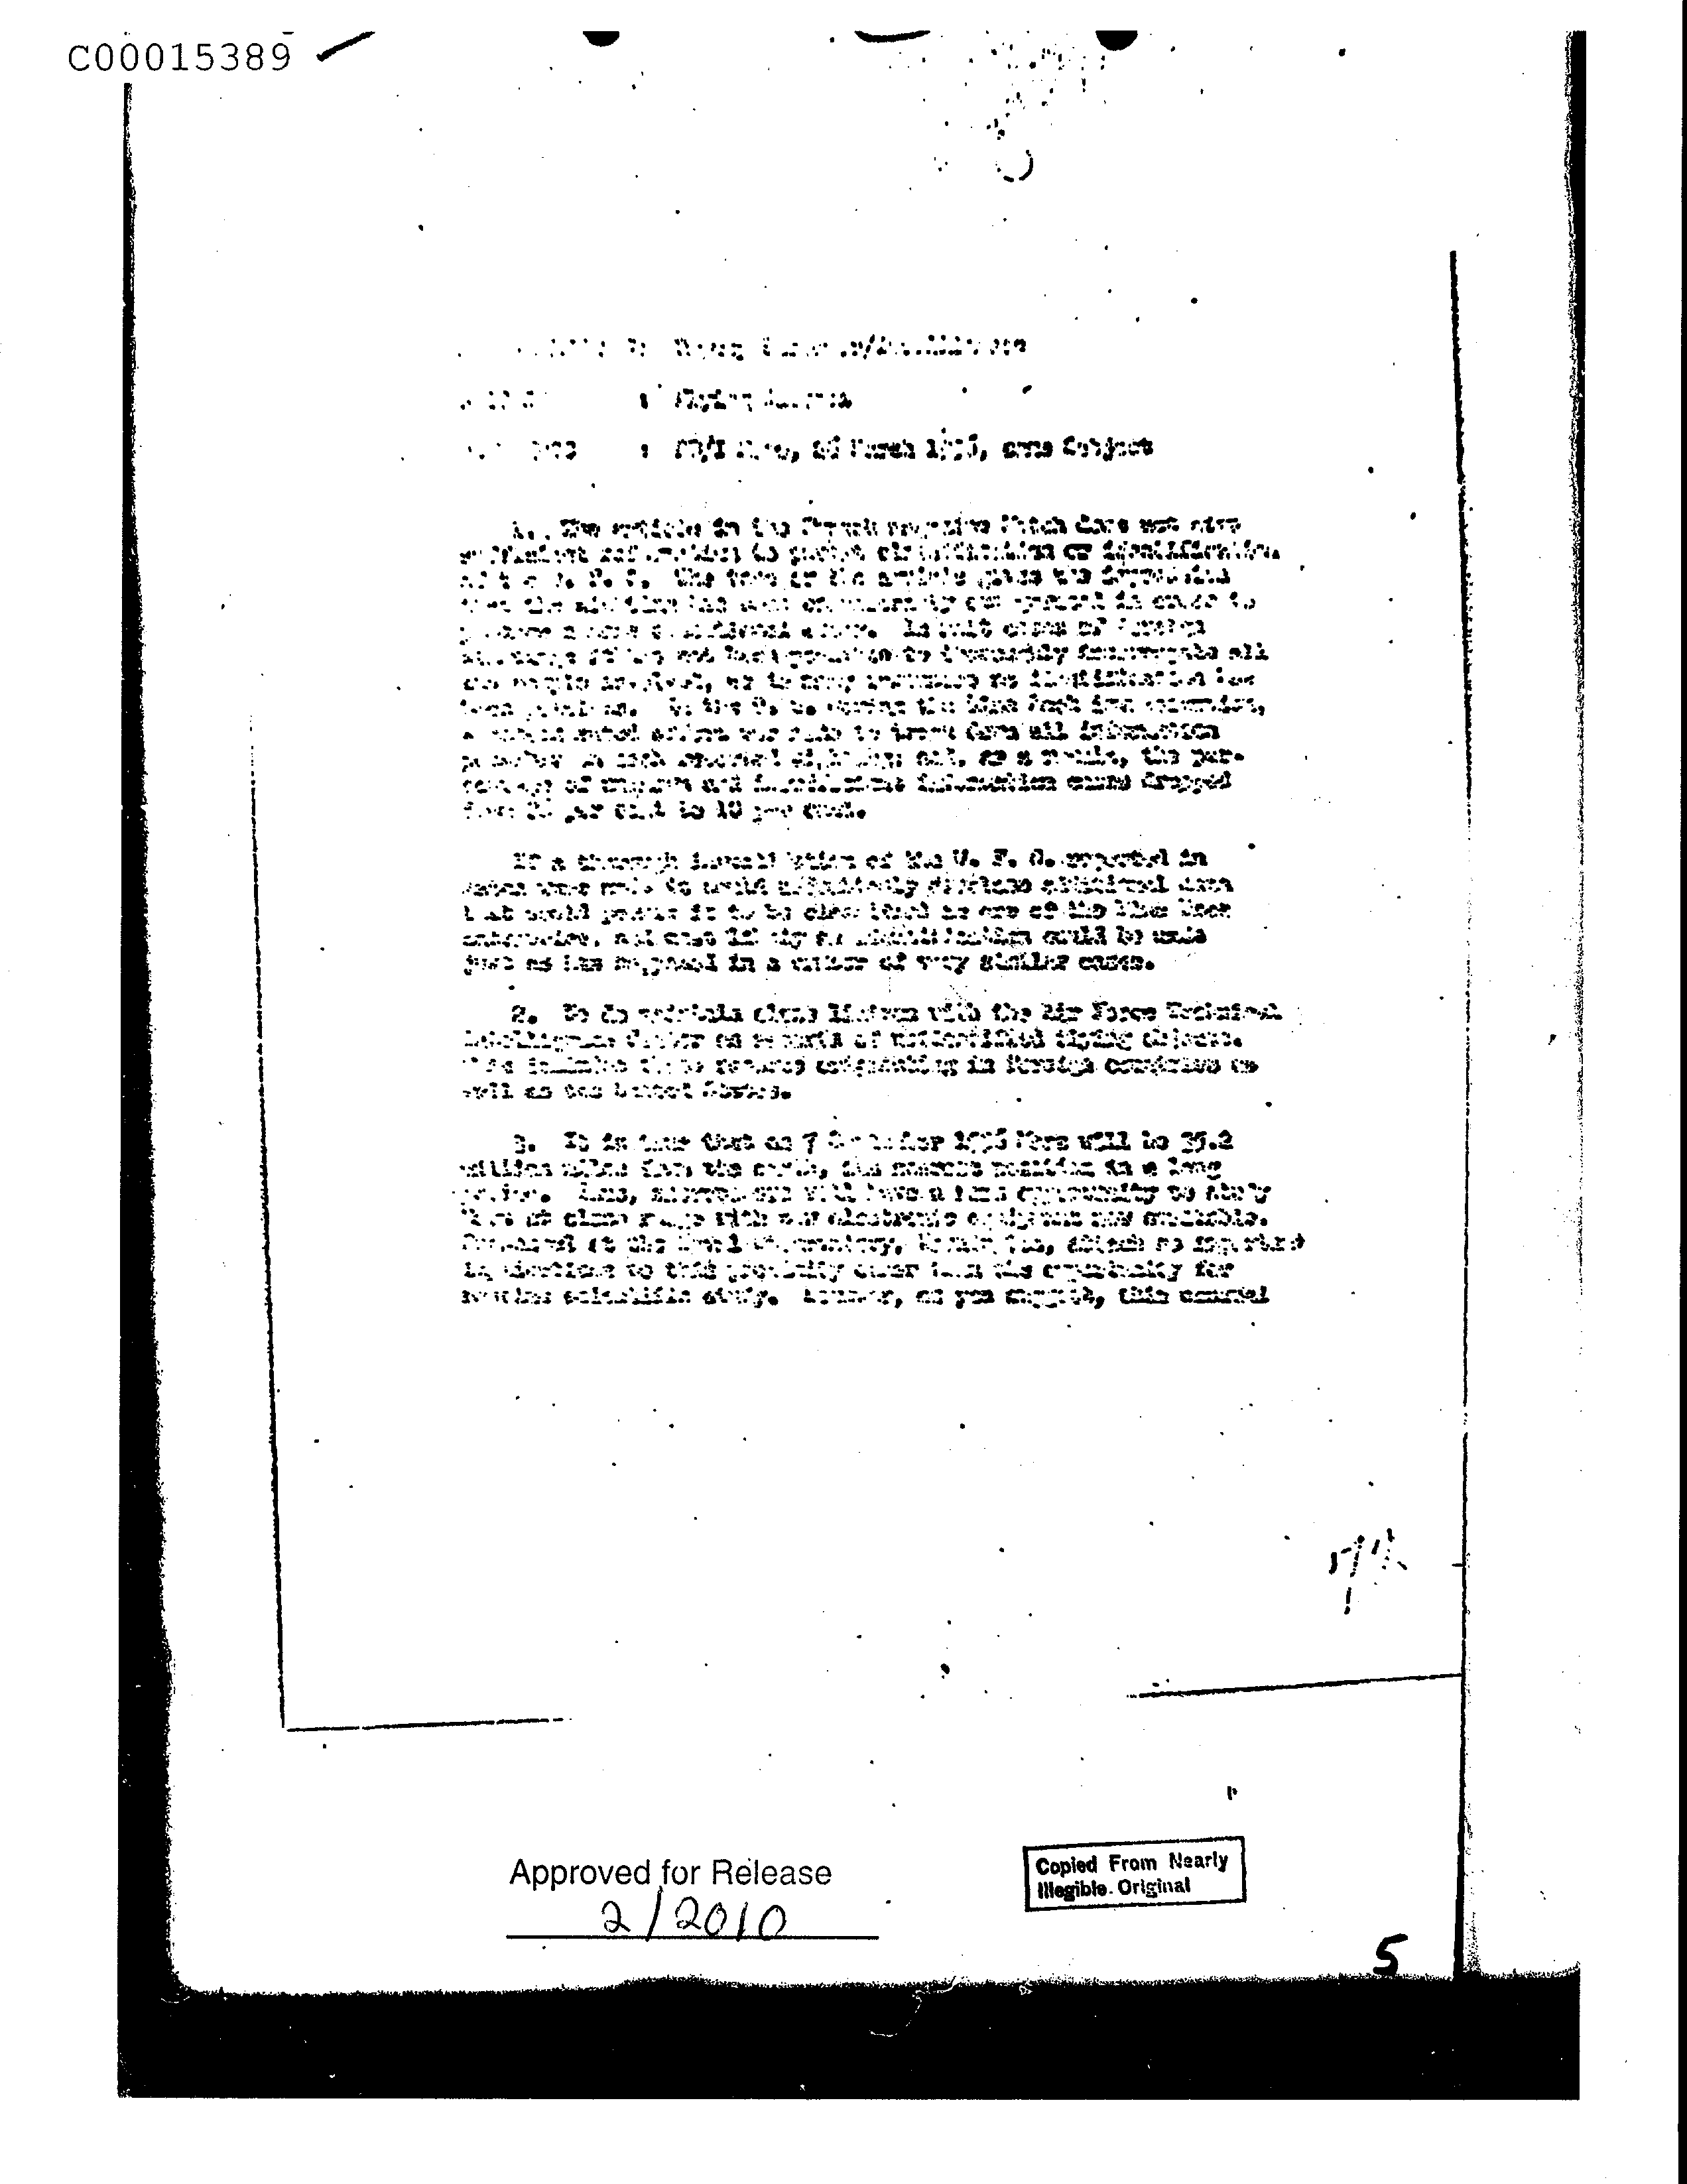

In [133]:
# Show the image
img

In [134]:
# Convert image to array
img_array = np.array(img)

# OCR image to string
img_text = pytesseract.image_to_string(img_array)
img_text

' \n\nr . w , , o &\nc00015389 —~ | | aa ‘\nF . elit tp Meer fos les ey ee\n\nsae “Faget aue . e\na ba Tne\n\n  \n\nSet CNS test\nfe CF 483\n+23 wy 4 ans\n\n@aat et\nef ee Aas\n\n \n  \n  \n\n   \n \n   \n    \n  \n  \n      \n\n   \n\nfim + or) 93,\n\neee 22. Sh Bast\n\n& 8 dee\n\n    \n  \n  \n \n \n\nake hy\n’ : lao to bene Cara ek inom sim\n23 PS\ncB\n\n \n\n \n\n. . . ‘ > %* te 4.\nEP a thom h Lue lt etter ed Sa Ue Fe Oe orawtel on\nwens eet mle 8G wks nla scp ep ertese ayes Tie lst\n"at ae, *. *\nLab sekd potas £t ty ba cles: its) 22 ere ef 9 the nee\n\n= 2 see.\n- - Mer 24\nBnd wel, BLL Stsd GS nay” Fiz\n\n      \n  \n  \n\nab SSohhER wud Be we\n2 eS Lan pied bia wats af vty SULLA? CRE.\n\n   \n\n \n\nHe Sa Ca tesr ha cles: Metra wy tor3 2s Force = sind\nLente os Cae Oa Be To P RITA soe 3S sagcas Gris\n\nfelines Ui he Cetaced tsreete a 13 feysica Oct :\n25 tes Liiet ope ise\n\n \n    \n\nplacate Ae eet $e A OOD AA TBH A eS *\n\na ER ce i FASE cept soled se tt mae eth an\n\n \n\n

In [135]:
# Save string as txt file
with open('output.txt', 'w') as f:
    f.write(img_text)

### Image cleanup

In [136]:
# Change data type for preprocessing
img_array = np.array(img_array, dtype=np.uint8)

# Build reference array of zeroes with same shape
norm_img = np.zeros((img_array.shape[0], img_array.shape[1]))

In [193]:
# Process the original array

# Create new array to hold the processed image array
img_array_proc = img_array

# Normalize between 0 and 255
img_array_proc = cv2.normalize(img_array_proc, norm_img, 0, 255, cv2.NORM_MINMAX)

# Thresholds between 0 and 255
img_array_proc = cv2.threshold(img_array_proc, 0, 255, cv2.THRESH_BINARY)[1]

# Gaussian blur, kernel size (height, width) should be odd
img_array_proc = cv2.GaussianBlur(img_array_proc, (15, 15), 0)

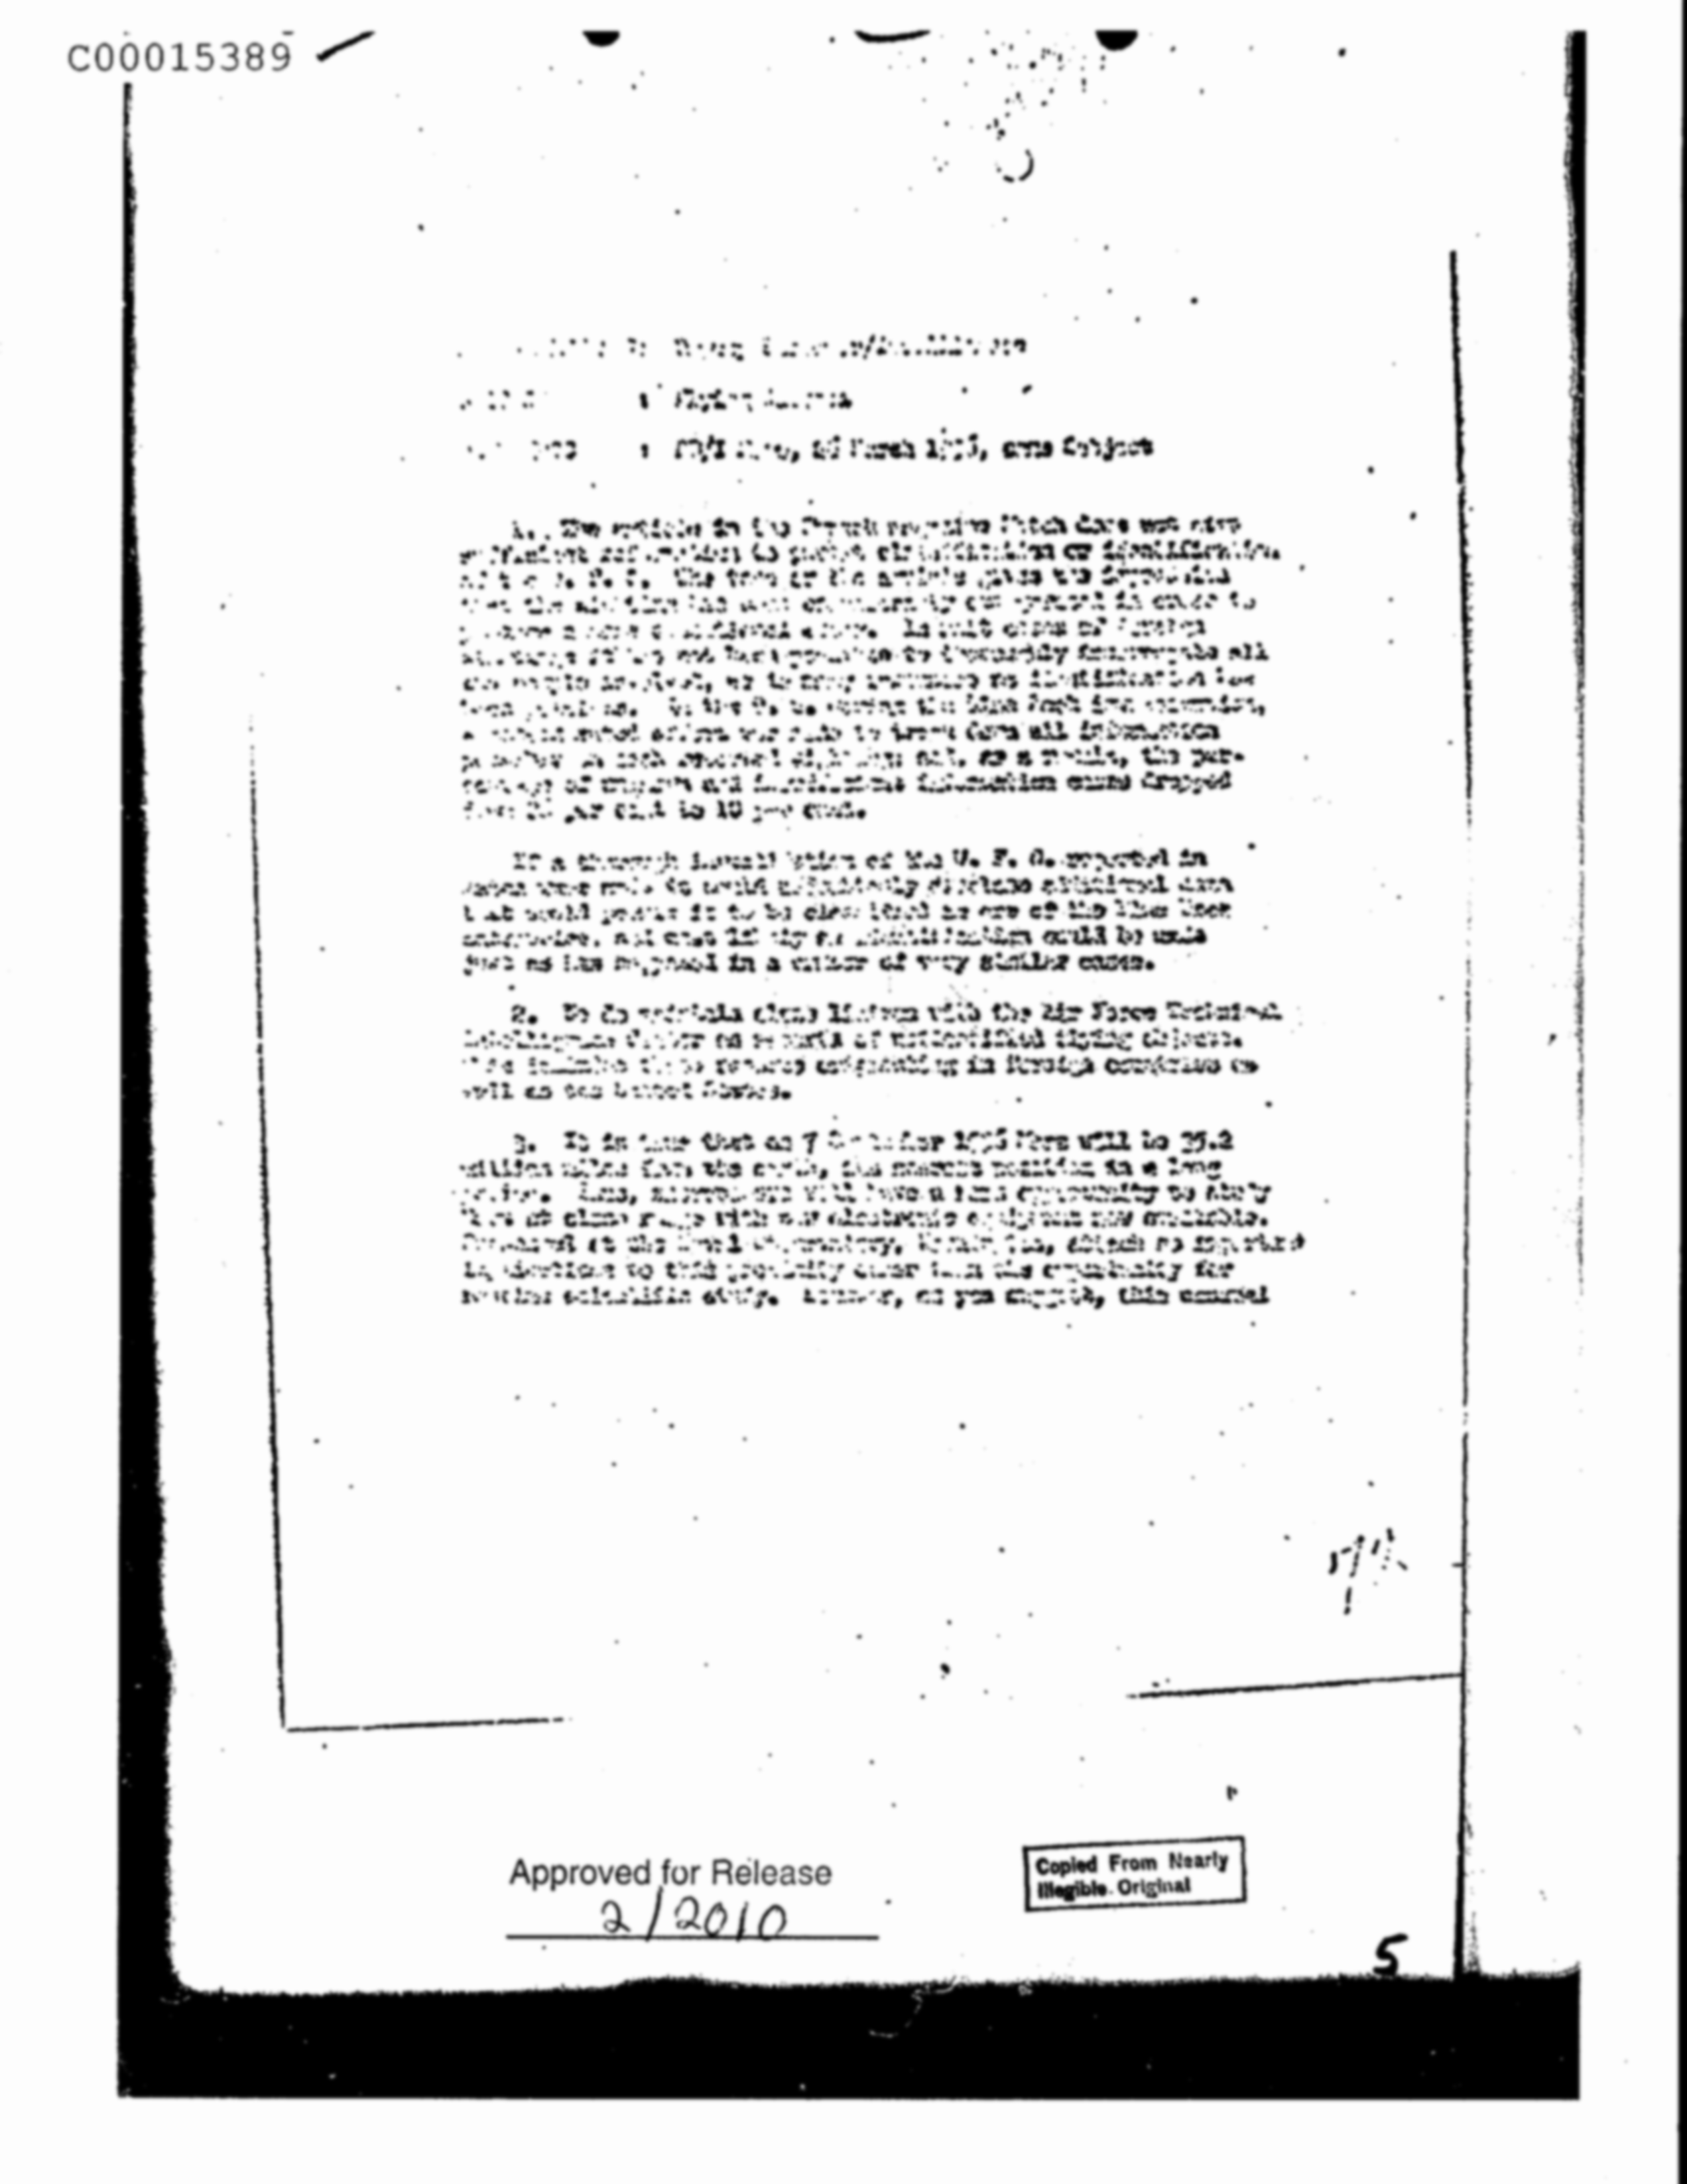

In [194]:
# Show processed image
img_proc = Image.fromarray(img_array_proc)
img_proc

In [195]:
# Show OCR result from processed image
img_proc_text = pytesseract.image_to_string(img_array_proc)
img_proc_text

'c00015389 — ee De - ;\n\n       \n  \n   \n    \n  \n    \n   \n  \n  \n    \n   \n   \n  \n       \n           \n   \n   \n\n2 ete Ge . a eee\n\noS Fr Reese & ont cB eo veces 259\n“** iodo ee . .\n: Q FaSh°s 200 5°3\n\n$23 OE sow, Of fare 2t), ere tps\n\nAe. De eeticie Oy Pert pert ta exe Oe rt\no Sfeel et S20 eth GD gett es eb ial thts “nay | phneeer pith wu\ne So te Se fe See tes te Ue avin 3 ad 33 GD She 0.8\n.\n\nore Sat ase S08 FAS wots GF. 2S ase SPSS SS ty CALo ta\n} ar 2 or 8 €. oe Ahevss a: "we 33 3° 2% crs oe * svar? =a\n\naie taret fT ed OM Mect or se tet 3238 Sy fete alk\nGee HITT Ste, Wa =z & ctr 23 a"s Sec? 8 2 ital ten\n"wn tnd ate Ys Mee Be Ve SEAT Ea “Som fas S-e. cram Seu\n\nlone woe 2 17 tet Cor a) Sbaette\nRa net teh. "3 alt. 9 aT ly > xr\nre ed Lol Coie Gute Coat\nw Ww sow Owe\n\n \n\noe en tatoo\n\n=t- a S.wr\n\nee one rtirs ef Y.2 Ve Fe Oe Conc on\nBS Cee me tS “At JT RSAN Op #3 elee £S" site oan\nL ad web3 ss’ yy 4 ba eles Leck 2 ere cf Lp lhe Scr\nettecwwlet,

In [196]:
# Check if the processing did anything
img_proc_text == img_text

False